In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as la
import pandas as pd

In [3]:
#Question 1a
a1 = [[10e10, 0],[0,10e-10]]
a2 = [[10e-10, 0],[0,10e-10]]
a3 = [[10e10, 0],[0,10e10]]
a4 = [[1, 2],[2,4 + 10e-10]]

print(a1)
print(la.cond(a1))
print(a2)
print(la.cond(a2))
print(a3)
print(la.cond(a3))
print(a4)
print(la.cond(a4))
print('As we can see the condition number of a1 and a4 is very large','(',la.cond(a1),')','&','(',la.cond(a4),')'
      'hence it is an ill conditioned matrix')

[[100000000000.0, 0], [0, 1e-09]]
1e+20
[[1e-09, 0], [0, 1e-09]]
1.0
[[100000000000.0, 0], [0, 100000000000.0]]
1.0
[[1, 2], [2, 4.000000001]]
24999967307.56635
As we can see the condition number of a1 and a4 is very large ( 1e+20 ) & ( 24999967307.56635 )hence it is an ill conditioned matrix


### Question 1b 
We can store a sparse matrix effectively by not trying to store the zeros which cosume memory. One of those methods could be creating and using a dictionary of keys.

In [4]:
#Question 2a
n = 10
A = np.empty(shape=(n, n))
for i in range(n):
    for j in range(n):
            A[i,j] = 1.0/(i+j+1)
print(A)
print('As we can see the condition number of hilbert 10 matrix is very large','(',la.cond(A),')', 'hence it is an ill conditioned matrix')

[[1.         0.5        0.33333333 0.25       0.2        0.16666667
  0.14285714 0.125      0.11111111 0.1       ]
 [0.5        0.33333333 0.25       0.2        0.16666667 0.14285714
  0.125      0.11111111 0.1        0.09090909]
 [0.33333333 0.25       0.2        0.16666667 0.14285714 0.125
  0.11111111 0.1        0.09090909 0.08333333]
 [0.25       0.2        0.16666667 0.14285714 0.125      0.11111111
  0.1        0.09090909 0.08333333 0.07692308]
 [0.2        0.16666667 0.14285714 0.125      0.11111111 0.1
  0.09090909 0.08333333 0.07692308 0.07142857]
 [0.16666667 0.14285714 0.125      0.11111111 0.1        0.09090909
  0.08333333 0.07692308 0.07142857 0.06666667]
 [0.14285714 0.125      0.11111111 0.1        0.09090909 0.08333333
  0.07692308 0.07142857 0.06666667 0.0625    ]
 [0.125      0.11111111 0.1        0.09090909 0.08333333 0.07692308
  0.07142857 0.06666667 0.0625     0.05882353]
 [0.11111111 0.1        0.09090909 0.08333333 0.07692308 0.07142857
  0.06666667 0.0625     

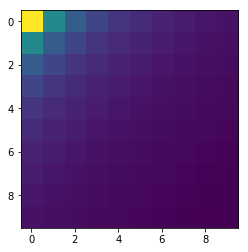

In [5]:
#Question 2b
plt.imshow(A)
plt.show()

In [6]:
#Question 2c
x = np.array([[1,1,1,1,1,1,1,1,1,1]]).T
b = A*x
delb = np.array([[10e-6,0,0,0,0,0,0,0,0,0]]).T
E = np.zeros(shape=(n, n))
E[0,0] = 10e-6
xh1 = b/(A+E)
xh2 = (b + delb)/A

In [7]:
print(xh1)
print(xh2)
x = b/A
print(x)

[[0.99999 1.      1.      1.      1.      1.      1.      1.      1.
  1.     ]
 [1.      1.      1.      1.      1.      1.      1.      1.      1.
  1.     ]
 [1.      1.      1.      1.      1.      1.      1.      1.      1.
  1.     ]
 [1.      1.      1.      1.      1.      1.      1.      1.      1.
  1.     ]
 [1.      1.      1.      1.      1.      1.      1.      1.      1.
  1.     ]
 [1.      1.      1.      1.      1.      1.      1.      1.      1.
  1.     ]
 [1.      1.      1.      1.      1.      1.      1.      1.      1.
  1.     ]
 [1.      1.      1.      1.      1.      1.      1.      1.      1.
  1.     ]
 [1.      1.      1.      1.      1.      1.      1.      1.      1.
  1.     ]
 [1.      1.      1.      1.      1.      1.      1.      1.      1.
  1.     ]]
[[1.00001 1.00002 1.00003 1.00004 1.00005 1.00006 1.00007 1.00008 1.00009
  1.0001 ]
 [1.      1.      1.      1.      1.      1.      1.      1.      1.
  1.     ]
 [1.      1.      1.      1.      

### Question 2c 
From above comparison we can clearly see the ideal middle solution comes to the x while xhat1 and xhat2 vary by a little amount, almost quidistantly, on the either side of the actual solution.

In [8]:
cond1 = la.norm(xh1 - x)/la.norm(x)
cond2 = la.norm(xh2 - x)/la.norm(x)
cond3 = la.cond(A) * la.norm(E)/la.norm(A)
cond4 = la.cond(A) * la.norm(delb)/la.norm(b)
print("inequalties")
print(cond1,"<=",cond3)
print(cond1,"<=",cond4)

print(cond2,"<=",cond3)
print(cond2,"<=",cond4)

inequalties
9.99990000105644e-07 <= 89748959.91887449
9.99990000105644e-07 <= 89748959.91887449
1.9621416870356042e-05 <= 89748959.91887449
1.9621416870356042e-05 <= 89748959.91887449


itr 0 x1 ,x2, x3 0.5 4.111111111111111 3.949074074074074
itr 1 x1 ,x2, x3 1.8433641975308641 2.7767489711934155 4.396111968449932
itr 2 x1 ,x2, x3 1.695476823273891 2.8256696768785248 4.355063399411929
itr 3 x1 ,x2, x3 1.6967888460484088 2.8293559471441796 4.3550842159167535
itr 4 x1 ,x2, x3 1.697406693843489 2.8289417356691455 4.355273195488444
itr 5 x1 ,x2, x3 1.6973691551929315 2.8289457637059963 4.355263475156066
itr 6 x1 ,x2, x3 1.6973682064770106 2.828947476220208 4.355263095267569
itr 7 x1 ,x2, x3 1.697368428581296 2.8289473703605177 4.355263159615281
itr 8 x1 ,x2, x3 1.697368421662633 2.828947367823213 4.355263158097057
itr 9 x1 ,x2, x3 1.697368420986712 2.8289473684425186 4.355263157876468
itr 10 x1 ,x2, x3 1.6973684210531645 2.8289473684227278 4.355263157894731
Converged
[3.39977830e-01 2.91997423e-02 7.16471357e-04 1.40470435e-04
 7.13528677e-06 3.65000334e-07 4.65464559e-08 1.37708472e-09
 1.72575232e-10 1.31232473e-11]


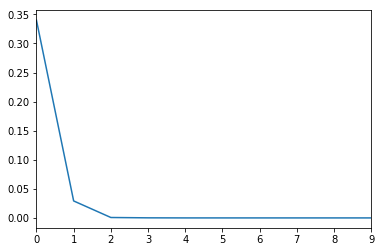

In [9]:
#Question 3a
x1 = 0; x2 = 0; x3 = 0
eps_a = 0.0000000001
converged = False

xold = np.array([x1, x2, x3])
itr = 0

solutions = []

while(not converged):
    x1 = (3+x2+x3)/6
    x2 = (40-x3-6*x1)/9
    x3 = (50-x2 +3*x1)/12
    
    xgnew = np.array([x1, x2, x3])
    solutions.append(xgnew)
    
    print("itr", itr,'x1 ,x2, x3', x1,x2,x3)
    itr = itr+ 1
    
    eps = np.sqrt(np.dot(xgnew-xold, xgnew-xold))
    if eps<eps_a:
        converged = True
        print('Converged')
        break
    xold=xgnew
    
solutions = np.array(solutions)
rel_err = la.norm(solutions[1:]-solutions[:-1],axis=-1)/la.norm(solutions[:-1],axis=-1)
print(rel_err)
pd.Series(rel_err).plot()
plt.show()

itr 0 x1 ,x2, x3 [0.45       3.7        3.55416667]
itr 1 x1 ,x2, x3 [1.70402778 2.86907407 4.31191744]
itr 2 x1 ,x2, x3 [1.69633192 2.83001012 4.3507488 ]
itr 3 x1 ,x2, x3 [1.69674315 2.82942136 4.35465067]
itr 4 x1 ,x2, x3 [1.69734034 2.8289897  4.35521094]
itr 5 x1 ,x2, x3 [1.69736627 2.82895016 4.35525822]
itr 6 x1 ,x2, x3 [1.69736801 2.82894774 4.35526261]
itr 7 x1 ,x2, x3 [1.69736839 2.82894741 4.3552631 ]
itr 8 x1 ,x2, x3 [1.69736842 2.82894737 4.35526315]
itr 9 x1 ,x2, x3 [1.69736842 2.82894737 4.35526316]
itr 10 x1 ,x2, x3 [1.69736842 2.82894737 4.35526316]
itr 11 x1 ,x2, x3 [1.69736842 2.82894737 4.35526316]
Converged
[3.39977830e-01 2.91997423e-02 7.16471357e-04 1.40470435e-04
 7.13528677e-06 3.65000334e-07 4.65464559e-08 1.37708472e-09
 1.72575232e-10 1.31232473e-11 3.43975333e-13]


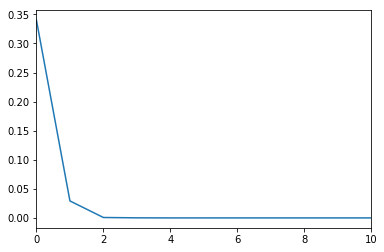

In [10]:
#Question 3b
x1 = 0; x2 = 0; x3 = 0
eps_a = 0.0000000001
converged = False
l = 0.9
xold = np.array([x1, x2, x3])
itr = 0
xnl = np.array([x1,x2,x3])

solutions = []

while not converged:
    x1 = (3+x2+x3)/6
    x2 = (40-x3-6*x1)/9
    x3 = (50-x2 +3*x1)/12
    
    xgnew = np.array([x1, x2, x3])
    solutions.append(xgnew)
    
    xnl = l*xgnew + (1-l)*xnl
    
    print("itr", itr,'x1 ,x2, x3', xnl)
    itr = itr+ 1
    
    eps = np.sqrt(np.dot(xnl-xold, xnl-xold))
    if eps<eps_a:
        converged = True
        print('Converged')
        break
    xold=xnl
    
solutions = np.array(solutions)
rel_err = la.norm(solutions[1:]-solutions[:-1],axis=-1)/la.norm(solutions[:-1],axis=-1)
print(rel_err)
pd.Series(rel_err).plot()
plt.show()

itr 0 x1 ,x2, x3 [0.55       4.52222222 4.34398148]
itr 1 x1 ,x2, x3 [1.97270062 2.60220165 4.40132502]
itr 2 x1 ,x2, x3 [1.66775444 2.84801648 4.35043724]
itr 3 x1 ,x2, x3 [1.69969229 2.82748989 4.35554891]
itr 4 x1 ,x2, x3 [1.69717813 2.82908692 4.35524562]
itr 5 x1 ,x2, x3 [1.69738826 2.82893165 4.35526526]
itr 6 x1 ,x2, x3 [1.6973662  2.82894906 4.35526288]
itr 7 x1 ,x2, x3 [1.69736865 2.8289472  4.35526319]
itr 8 x1 ,x2, x3 [1.6973684  2.82894738 4.35526316]
itr 9 x1 ,x2, x3 [1.69736842 2.82894737 4.35526316]
itr 10 x1 ,x2, x3 [1.69736842 2.82894737 4.35526316]
itr 11 x1 ,x2, x3 [1.69736842 2.82894737 4.35526316]
itr 12 x1 ,x2, x3 [1.69736842 2.82894737 4.35526316]
Converged
[3.39977830e-01 2.91997423e-02 7.16471357e-04 1.40470435e-04
 7.13528677e-06 3.65000334e-07 4.65464559e-08 1.37708472e-09
 1.72575232e-10 1.31232473e-11 3.43975333e-13 6.58543275e-14]


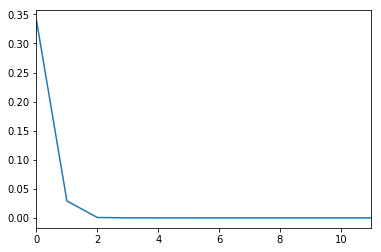

In [11]:
#Question 3c
x1 = 0; x2 = 0; x3 = 0
eps_a = 0.0000000001
converged = False
l = 1.1
xold = np.array([x1, x2, x3])
itr = 0
xnl2 = np.array([x1,x2,x3])
lis = []

solutions = []

while not converged:
    x1 = (3+x2+x3)/6
    x2 = (40-x3-6*x1)/9
    x3 = (50-x2 +3*x1)/12
    
    xgnew = np.array([x1, x2, x3])
    solutions.append(xgnew)
    
    xnl2 = l*xgnew + (1-l)*xnl2
    
    print("itr", itr,'x1 ,x2, x3', xnl2)
    itr = itr+ 1
    
    eps = np.sqrt(np.dot(xnl2-xold, xnl2-xold))
    if eps<eps_a:
        converged = True
        print('Converged')
        break
    xold=xnl2
    
solutions = np.array(solutions)
rel_err = la.norm(solutions[1:]-solutions[:-1],axis=-1)/la.norm(solutions[:-1],axis=-1)
print(rel_err)
pd.Series(rel_err).plot()
plt.show()